# Introduction to LLMs
Large Language Models (LLMs) are AI models that can generate human-like text based on given prompts. They work by:


*  Understanding and tokenizing the input text.
*  Predicting the most likely sequence of words (tokens) to follow.
*   Using probabilities to generate coherent and contextually relevant outputs.



##Setting Up the Environment
Below is the code to set up the environment using the Hugging Face transformers library:

In [2]:
# Importing necessary libraries
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM, pipeline, set_seed
import matplotlib.pyplot as plt

# Checking if GPU is available
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")


Using device: cpu


# Tokenization
In this section, we'll explain tokenization and demonstrate it using a sample prompt.

In [3]:
# Load a pre-trained GPT model and its tokenizer
model_name = "gpt2"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(model_name).to(device)

# Sample text for tokenization
text = "Artificial Intelligence is transforming the world."

# Tokenizing the text
tokens = tokenizer.encode(text, return_tensors="pt").to(device)
print(f"Tokens: {tokens}")

# Decoding tokens back to text
decoded_text = tokenizer.decode(tokens[0])
print(f"Decoded Text: {decoded_text}")


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

Tokens: tensor([[ 8001,  9542,  9345,   318, 25449,   262,   995,    13]])
Decoded Text: Artificial Intelligence is transforming the world.


Tokenization converts text into numerical tokens that the model can understand.
Each token represents a word, part of a word, or a special character.

# Understanding Token Probabilities
We'll explore how LLMs generate text using token probabilities.

In [4]:
# Generate output with token probabilities
input_ids = tokenizer.encode("The future of AI", return_tensors="pt").to(device)
output = model(input_ids)

# Extract logits (raw scores) for the next token prediction
logits = output.logits[0, -1, :]
probs = torch.softmax(logits, dim=0)

# Show the top 5 probable tokens
top_k = 5
top_k_indices = torch.topk(probs, top_k).indices
top_k_probs = torch.topk(probs, top_k).values

# Display top-k tokens with their probabilities
for i in range(top_k):
    token = tokenizer.decode(top_k_indices[i].item())
    print(f"Token: {token}, Probability: {top_k_probs[i].item():.4f}")


Token:  is, Probability: 0.2314
Token:  in, Probability: 0.0686
Token:  and, Probability: 0.0668
Token:  will, Probability: 0.0649
Token: ,, Probability: 0.0427


#Text Generation
We'll demonstrate how LLMs generate text and how different parameters affect the output.

In [5]:
# Generating text using different decoding methods
def generate_text(prompt, max_length=50, temperature=0.7, top_k=50, top_p=0.9):
    input_ids = tokenizer(prompt, return_tensors="pt").input_ids.to(device)
    output = model.generate(
        input_ids,
        max_length=max_length,
        temperature=temperature,
        top_k=top_k,
        top_p=top_p,
        do_sample=True,
    )
    return tokenizer.decode(output[0], skip_special_tokens=True)

# Example prompt
prompt = "The advancements in artificial intelligence"
print(generate_text(prompt))


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.


The advancements in artificial intelligence and artificial intelligence technologies have enabled us to build new technologies to help us solve many of the challenges of our time. However, many of our technological achievements have been based on the assumption that humans will eventually become super-intelligent


Temperature: Controls randomness in generation. Higher values (e.g., 1.0) make output more random.

Top-k Sampling: Limits selection to the top-k probable tokens.

Top-p Sampling (Nucleus Sampling): Limits selection to tokens that cover a cumulative probability of p.

#Stochastic Nature of LLMs
Here, we'll show how randomness affects outputs by generating multiple responses for the same prompt.

In [6]:
# Generate multiple outputs for the same prompt
set_seed(42)  # Setting a seed for reproducibility
for i in range(3):
    print(f"Output {i+1}: {generate_text(prompt)}\n")


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


Output 1: The advancements in artificial intelligence have allowed researchers to create more accurate models of human behavior, including how people behave in the world. The results are presented at the International Conference on Artificial Intelligence (ICAI) in Seoul, South Korea, on October 7-



The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


Output 2: The advancements in artificial intelligence have been made possible by the development of new algorithms that are able to recognize people's faces in a variety of ways, from the way they look to how they behave.

The first such algorithm, known as the Face

Output 3: The advancements in artificial intelligence and robotics have made it possible to create a computer that is capable of performing complex tasks that have never been done before.

"We're doing things that will not be possible before," said Dr. Gail M.



 # Prompt Engineering

This section covers how modifying prompts can change the outputs generated.

In [7]:
# Testing prompt engineering
prompts = [
    "Explain the concept of machine learning.",
    "Explain the concept of machine learning in simple terms.",
    "Explain machine learning to a 10-year-old.",
]

for p in prompts:
    print(f"Prompt: {p}")
    print(generate_text(p))
    print("\n" + "-"*50 + "\n")


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


Prompt: Explain the concept of machine learning.


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


Explain the concept of machine learning.

This is the third article in a series of articles in Computer Vision and Machine Learning.

The first article is from the Computer Vision and Machine Learning Institute.

The second article is from the

--------------------------------------------------

Prompt: Explain the concept of machine learning in simple terms.


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


Explain the concept of machine learning in simple terms.

The machine learning is a system of learning that can be applied to any task. In particular, machine learning is a system that can be applied to any task in the world.



--------------------------------------------------

Prompt: Explain machine learning to a 10-year-old.
Explain machine learning to a 10-year-old.

The next step is to find a way to teach students the basics of machine learning.

"We have some of the most advanced systems available," said Chris Binder, a

--------------------------------------------------




## Tokenization Explained in Detail

In this section, we'll dive deeper into tokenization. The process of tokenization is essential for transforming raw text into tokens that the model can understand. Each token represents a word, part of a word, or even special characters.

Let's see a practical demonstration of how a sentence is tokenized using a pre-trained GPT model. We will also visualize how text is broken down into tokens.


Tokens: tensor([[ 8001,  9542,  9345,   318, 25449,   262,   995,    13]])
Decoded Text: Artificial Intelligence is transforming the world.


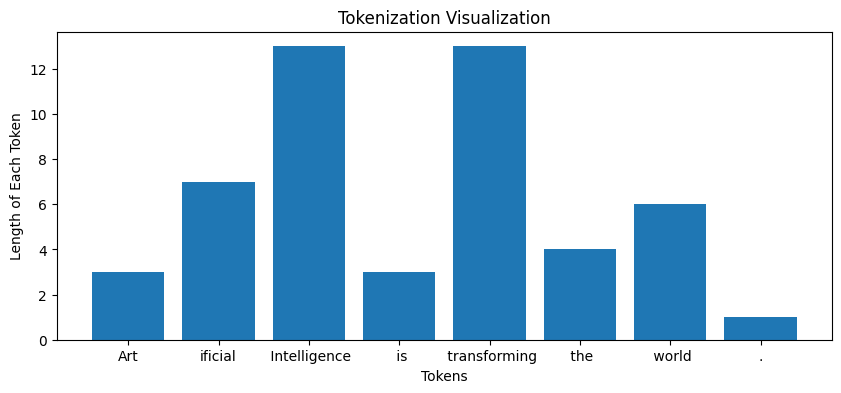

In [8]:


# Load a pre-trained GPT model and its tokenizer
model_name = "gpt2"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(model_name)

# Sample text for tokenization
text = "Artificial Intelligence is transforming the world."

# Tokenizing the text
tokens = tokenizer.encode(text, return_tensors="pt")
print(f"Tokens: {tokens}")

# Decoding tokens back to text
decoded_text = tokenizer.decode(tokens[0])
print(f"Decoded Text: {decoded_text}")

# Visualize tokenization
token_texts = [tokenizer.decode([token]) for token in tokens[0]]
plt.figure(figsize=(10, 4))
plt.bar(range(len(token_texts)), [len(token) for token in token_texts], tick_label=token_texts)
plt.xlabel('Tokens')
plt.ylabel('Length of Each Token')
plt.title('Tokenization Visualization')
plt.show()



## Understanding Token Probabilities

LLMs generate text by predicting the next token based on the probability distribution over the vocabulary. The model assigns a probability to each token, indicating how likely it is to come next given the input text.

We'll demonstrate how the model generates probabilities for the next token using a simple prompt.


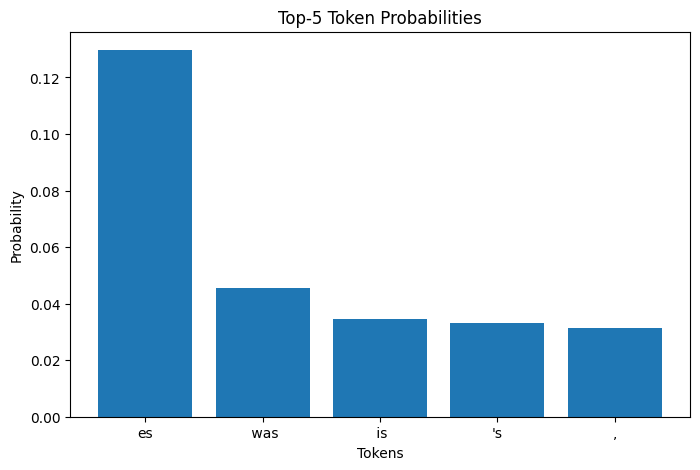

Token: es, Probability: 0.1297
Token:  was, Probability: 0.0457
Token:  is, Probability: 0.0344
Token: 's, Probability: 0.0332
Token: ,, Probability: 0.0313


In [9]:

# Generate output with token probabilities
input_text = "The quick brown fox"
input_ids = tokenizer.encode(input_text, return_tensors="pt")
output = model(input_ids)

# Extract logits (raw scores) for the next token prediction
logits = output.logits[0, -1, :]
probs = torch.softmax(logits, dim=0)

# Show the top 5 probable tokens
top_k = 5
top_k_indices = torch.topk(probs, top_k).indices
top_k_probs = torch.topk(probs, top_k).values

# Visualize token probabilities
top_k_tokens = [tokenizer.decode([idx]) for idx in top_k_indices]
plt.figure(figsize=(8, 5))
plt.bar(top_k_tokens, top_k_probs.detach().numpy())
plt.xlabel('Tokens')
plt.ylabel('Probability')
plt.title('Top-5 Token Probabilities')
plt.show()

# Display top-k tokens with their probabilities
for i in range(top_k):
    token = tokenizer.decode([top_k_indices[i].item()])
    print(f"Token: {token}, Probability: {top_k_probs[i].item():.4f}")



## Exploring the Stochastic Nature of LLMs

The behavior of LLMs can be controlled by various parameters during text generation:

- **Temperature**: Controls the randomness of predictions. A higher temperature value (e.g., 1.0) makes the model generate more random outputs, while a lower value (e.g., 0.2) makes it more focused and deterministic.
- **Top-k Sampling**: Limits the model’s token choices to the top-k most probable tokens.
- **Top-p Sampling (Nucleus Sampling)**: Limits token selection to those with a cumulative probability below a threshold (p).

Let's experiment with these parameters to see their effects on the generated text.


In [11]:
# Function to generate text with different parameters
def generate_text(prompt, max_length=50, temperature=0.7, top_k=50, top_p=0.9):
    input_ids = tokenizer(prompt, return_tensors="pt").input_ids
    output = model.generate(
        input_ids,
        max_length=max_length,
        temperature=temperature,
        top_k=top_k,
        top_p=top_p,
        do_sample=True,
    )
    return tokenizer.decode(output[0], skip_special_tokens=True)

# Testing with different temperatures
prompt = "Once upon a time"
print("Temperature 0.2:", generate_text(prompt, temperature=0.2))
print("Temperature 0.7:", generate_text(prompt, temperature=0.7))
print("Temperature 1.0:", generate_text(prompt, temperature=1.0))


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


Temperature 0.2: Once upon a time, the world was a place of great beauty and great danger. The world was a place of great danger. The world was a place of great danger. The world was a place of great danger. The world was a place of


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


Temperature 0.7: Once upon a time, she saw him and she said, 'How can I say that you were a man?' He said, 'I had a son.' And she said, 'I heard you say that. How can I say that you were
Temperature 1.0: Once upon a time, I felt at ease with the thought of being able to control the emotions. And yet it took me a little while to come to accept it as a reality. I was also afraid of feeling too proud of myself, because there



## Interactive Prompt Engineering

Try modifying the prompt and parameters to see how they affect the output. This is an important aspect of prompt engineering, where small changes in the input can lead to different outputs.


In [12]:

import ipywidgets as widgets
from IPython.display import display

# Interactive function for prompt engineering
def interactive_prompt(prompt, temperature=0.7, top_k=50, max_length=50):
    print(generate_text(prompt, temperature=temperature, top_k=top_k, max_length=max_length))

prompt_input = widgets.Text(value="Explain the concept of deep learning.", description='Prompt:')
temperature_slider = widgets.FloatSlider(value=0.7, min=0.1, max=1.5, step=0.1, description='Temperature:')
top_k_slider = widgets.IntSlider(value=50, min=1, max=100, step=1, description='Top-k:')
length_slider = widgets.IntSlider(value=50, min=10, max=100, step=10, description='Max Length:')

widgets.interactive(interactive_prompt, prompt=prompt_input, temperature=temperature_slider, top_k=top_k_slider, max_length=length_slider)


interactive(children=(Text(value='Explain the concept of deep learning.', description='Prompt:'), FloatSlider(…


# **Conclusion**

In this notebook, we explored how Large Language Models (LLMs) like GPT work, focusing on key concepts such as:
1. **Tokenization**: Transforming text into tokens that the model can understand.
2. **Token Probabilities**: Understanding how the model assigns probabilities to different tokens when generating text.
3. **Text Generation**: Using different techniques like temperature, top-k, and top-p sampling to control text generation.
4. **Stochastic Nature**: Demonstrating how randomness plays a role in generating diverse outputs even with the same prompt.
5. **Prompt Engineering**: Highlighting how small changes in the prompt can significantly impact the output.

These concepts are crucial for understanding how LLMs generate human-like text and how to leverage them effectively in various applications.

## **Next Steps**

If you'd like to explore further, consider the following:
- Experiment with different prompts to see how the model behaves.
- Try adjusting the temperature, top-k, and top-p parameters to observe how they change the output.
- Explore other pre-trained models available in the Hugging Face model hub.
- Apply these techniques to a real-world task, such as text summarization, chatbot development, or content generation.

### **Additional Resources**
- [Hugging Face Transformers Documentation](https://huggingface.co/transformers/)
- [OpenAI GPT-3 Documentation](https://beta.openai.com/docs/)
- [NLP with Python](https://www.nltk.org/book/)

We hope this notebook has given you a foundational understanding of how LLMs work. Happy experimenting!
